# SENTIMENT ANALYSIS OF CUSTOMER REVIEWS USING RANDOM FOREST CLASSIFIER



### Contributed By:

1. Niyanta Pandey
2. Gautam Bhatt
3. Akshit Arora

## ABSTRACT

In an era where customer feedback can make or break the reputation of a service provider, particularly in the highly competitive airline industry, understanding and analyzing customer sentiment has become more crucial than ever. This research aims to bring a new dimension to how airline companies view and analyze customer reviews, by leveraging the power of sophisticated sentiment analysis. With an increasing number of passengers sharing their experiences online, there is a tons of data waiting to be explored and understood.

The airline industry, characterized by its global reach and diverse customer base, presents unique challenges and opportunities in customer experience management. Passengers' feedback, ranging from praise for exceptional service to critiques of flight delays and poor in-flight amenities, offers a direct insight into the strengths and weaknesses of an airline's service. By harnessing advanced Natural Language Processing (NLP) and machine learning techniques, this research aims to systematically analyze this feedback, categorizing it into distinct sentiment classes and uncovering underlying trends and patterns.

At the heart of our approach lies a comprehensive dataset, comprising a multitude of airline reviews from various platforms (Skytrax and Twitter) These reviews serve as a window into the passengers' minds, revealing their true sentiments about their airline experiences. Through meticulous preprocessing, feature extraction, and sentiment classification, we aim to translate these textual reviews into quantifiable data that can effectively inform airline strategies and decision-making processes. This research goes beyond traditional sentiment analysis by integrating both qualitative and quantitative methods to provide a holistic view of customer sentiment. Our analysis not only quantifies the sentiments expressed in the reviews but also delves into the reasons behind these sentiments, identifying key factors that influence passenger satisfaction. By mapping out these factors and analyzing how they change over time, we aim to offer actionable insights that can guide airlines in enhancing their service quality and customer satisfaction.

Moreover, the study recognizes the dynamic nature of customer sentiment, acknowledging that it evolves with changing market conditions, consumer expectations, and operational strategies of airlines. Thus, a significant part of our research is dedicated to temporal analysis, tracing the trajectory of customer sentiment over time. This temporal perspective is vital for understanding the impact of specific events, policy changes, or market shifts on customer perceptions and for predicting future trends in the airline industry.

In summary, this research is not just an academic exercise in sentiment analysis; it is a concerted effort to bridge the gap between customer feedback and airline service improvement strategies. By offering a comprehensive analysis of customer reviews, enriched with advanced analytical techniques, we aim to provide the airline industry with a roadmap for understanding and enhancing customer experiences in a rapidly evolving market.

## INTRODUCTION

The methodology we adopt is comprehensive and multifaceted. It begins with data collection and cleaning, where we compile and refine airline reviews from various channels. This is succeeded by a detailed process of feature extraction, where we pinpoint and analyze crucial aspects of airline service such as comfort, customer service, and timeliness, as frequently highlighted in customer reviews. We then utilize sophisticated machine learning algorithm ie. Random Forest Classifier to precisely categorize these reviews into sentiment classifications - positive, negative, or neutral.

Our analysis goes beyond simple sentiment classification. We delve into uncovering significant industry trends, with a keen focus on identifying the top ten best and worst airlines globally. This involves an in-depth examination of passenger preferences and areas in need of enhancement. Additionally, our study includes a time-series analysis to track how airline ratings have progressed over time.

The thorough assessment of both high-performing and underperforming airlines in our research is tailored to provide industry stakeholders with valuable insights to improve service quality and enhance customer satisfaction. By analyzing passenger sentiment patterns and preferences, airlines are better positioned to refine their strategies in line with customer expectations that are continuously evolving.

In summary, this research presents a solid framework for performing sentiment analysis in the airline industry. It emphasizes not only on extracting meaningful insights from textual data but also on enriching the analysis by integrating trends associated with top-performing and improving airlines. This dual approach yields valuable insights, benefiting both academic research and the aviation industry broadly.

# Research Approach 

The end-to-end methodology employed in our final project involved a systematic approach, integrating various stages of data processing, exploratory data analysis (EDA), and investigative analysis. The primary goal was to extract valuable insights from airline reviews and ratings data, facilitating sentiment analysis and uncovering patterns within customer feedback.

**Data Collection and Management:**
In the initial phase, we utilized Beautiful Soup to automate the extraction of detailed information from the following sources: 

https://skytraxratings.com: Skytrax, a renowned platform, specializes in collecting and publishing reviews and ratings for airlines and airports globally. We are utilizing data from skytraxratings.com to extract valuable insights on airline reviews. The information will be gathered through web scraping for analysis in our research.

https://data.world/crowdflower/airline-twitter-sentiment: The CSV dataset sourced from data.world focuses specifically on reviews from Twitter, concentrating solely on U.S. airlines. Initially, our plan was to extract this data directly from Twitter's server using its API. However, due to Twitter's updated access control for developer access in version 2 (v2), we opted to utilize this dataset as an alternative source.

To manage the collected data effectively, a structured approach was employed, organizing it into a well-defined dataset that encapsulated key attributes, such as review text, ratings, and additional metadata.

**Data Cleaning:**
Tasks related to data cleaning were focused on ensuring the dataset was robust and ready for analysis. This involved breaking down reviews into individual words through tokenization, removing non-informative words using stopword removal techniques, and simplifying words to their base form through lemmatization. Natural language processing libraries such as NLTK or SpaCy played a pivotal role in these tasks, contributing to the overall cleanliness and quality of the dataset.

**Sentiment Analysis:**
Building on the EDA findings, sentiment analysis efforts included scoring words in reviews using existing lexicons and implementing machine learning models, such as Support Vector Machines (SVM), to predict the sentiment of reviews. Machine learning libraries like Scikit-learn and TensorFlow were instrumental in this phase, contributing to the development of a robust sentiment analysis model.

**Feature Engineering:**
Contribution to the project involved performing feature engineering tasks. This included assigning weights to words based on their importance using TF-IDF and representing words in a way that captured their meaning relationships, known as Word Embeddings. These techniques enhanced the richness of the features used in subsequent analyses.

**Exploratory Data Analysis (EDA):**
Collaborative efforts in exploratory data analysis delved into the dataset to extract meaningful insights.  Visualizations, statistical summaries, and data profiling were key components of the EDA, revealing trends, outliers, and patterns within the data.

Throughout the entire process, a comprehensive data management strategy ensured the integrity and traceability of the data at each stage. Regular checkpoints and documentation facilitated collaboration among team members, fostering a cohesive and efficient workflow. The methodology outlined above reflects a holistic approach that seamlessly integrates data collection, cleaning, exploration, and analysis, resulting in a thorough and insightful examination of airline reviews and ratings.

##  Scrape the Skytrax Website to fetch Airline Reviews

In [87]:
import csv
import requests

from typing import List, Tuple
from bs4 import BeautifulSoup
from urllib.parse import urljoin

#maximum number of reviews per airlines to avoid IP blocking during web scraping
PAGE_SIZE = 1000 

def get_page_content(url: str) -> str:
    response = requests.get(url)
    return response.text


def parse_airlines(content: str) -> List[Tuple[str, str]]:
    soup = BeautifulSoup(content, "html.parser")

    result = []
    for tag in soup.find_all("ul", class_="items"):
        for li_tag in tag.find_all("li"):
            a_tag = li_tag.find("a")
            result.append((a_tag["href"], a_tag.text))
    return result


def get_review_title(article):
    node = article.find("h2", class_="text_header")
    if node is not None:
        return node.text


def get_review_content(article):
    node = article.find("div", class_="text_content", itemprop="reviewBody")
    if node is not None:
        return node.text


def get_traveller_type(article):
    node = article.find("td", class_="type_of_traveller")
    if node is not None:
        sibling = node.next_sibling
        if sibling is not None:
            return sibling.text


def get_seat_type(article):
    node = article.find("td", class_="cabin_flown")
    if node is not None:
        sibling = node.next_sibling
        if sibling is not None:
            return sibling.text


def get_date_flown(article):
    node = article.find("td", class_="date_flown")
    if node is not None:
        sibling = node.next_sibling
        if sibling is not None:
            return sibling.text


def get_rating(article):
    node = article.find("div", class_="rating-10", itemprop="reviewRating")
    if node is not None:
        span = node.find("span")
        if span is not None:
            return span.text


def get_reviewer_name(article):
    node = article.find("span", itemprop="name")
    if node is not None:
        return node.text


def get_publish_datetime(article):
    node = article.find("time")
    if node is not None:
        return node["datetime"]


def get_seat_comfort_rating(article):
    node = article.find("td", class_="seat_comfort")
    if node is not None:
        parent = node.parent
        if parent is not None:
            return len(parent.find_all("span", class_="fill"))


def get_cabin_staff_service_rating(article):
    node = article.find("td", class_="cabin_staff_service")
    if node is not None:
        parent = node.parent
        if parent is not None:
            return len(parent.find_all("span", class_="fill"))


def get_food_rating(article):
    node = article.find("td", class_="food_and_beverages")
    if node is not None:
        parent = node.parent
        if parent is not None:
            return len(parent.find_all("span", class_="fill"))


def get_ground_service_rating(article):
    node = article.find("td", class_="ground_service")
    if node is not None:
        parent = node.parent
        if parent is not None:
            return len(parent.find_all("span", class_="fill"))


def get_value_for_money_rating(article):
    node = article.find("td", class_="value_for_money")
    if node is not None:
        parent = node.parent
        if parent is not None:
            return len(parent.find_all("span", class_="fill"))


def get_recommended(article):
    node = article.find("td", class_="recommended")
    if node is not None:
        parent = node.parent
        if parent is not None:
            td = parent.find("td", class_="review-value")
            if td is not None:
                return td.text


def get_reviews_for_airlines(airline_url: str):
    reviews = []
    response = requests.get(airline_url, params=dict(pagesize=PAGE_SIZE))
    soup = BeautifulSoup(response.text, "html.parser")
    for article in soup.find_all("article", itemprop="review"):
        # Get the rating for the review
        rating = get_rating(article)
        reviewer = get_reviewer_name(article)
        review_datetime = get_publish_datetime(article)
        review_title = get_review_title(article)
        review_content = get_review_content(article)
        traveller_type = get_traveller_type(article)
        seat_type = get_seat_type(article)
        date_flown = get_date_flown(article)
        seat_comfort_rating = get_seat_comfort_rating(article)
        cabin_staff_service_rating = get_cabin_staff_service_rating(article)
        food_rating = get_food_rating(article)
        ground_service_rating = get_ground_service_rating(article)
        value_for_money_rating = get_value_for_money_rating(article)
        recommended = get_recommended(article)

        reviews.append(
            (
                review_datetime,
                reviewer,
                rating,
                review_title,
                review_content,
                traveller_type,
                seat_type,
                date_flown,
                str(seat_comfort_rating),
                str(cabin_staff_service_rating),
                str(food_rating),
                str(ground_service_rating),
                str(value_for_money_rating),
                recommended,
            )
        )
    return reviews


def main():
    base_url = "https://www.airlinequality.com/"
    airlines_listing_url = urljoin(base_url, "review-pages/a-z-airline-reviews")
    response = get_page_content(airlines_listing_url)
    airlines = parse_airlines(response)

    file = open("data.csv", mode="w", newline="")
    csv_writer = csv.writer(file)
    headers = [
        "airline",
        "review_date",
        "reviewer",
        "rating",
        "review_title",
        "review",
        "traveller_type",
        "seat_type",
        "date_flown",
        "seat_comfort_rating",
        "cabin_staff_service_rating",
        "food_rating",
        "ground_service_rating",
        "value_for_money_rating",
        "recommended",
    ]
    csv_writer.writerow(headers)
    for airline in airlines:
        airline_review_url = urljoin(base_url, airline[0])
        reviews = get_reviews_for_airlines(airline_review_url)
        csv_writer.writerows((airline[1], *row) for row in reviews)
        file.flush()
        print("done for {}".format(airline))
    file.close()
    print("complete...")


if __name__ == "__main__":
    main()

done for ('/airline-reviews/ab-aviation', 'AB Aviation')
done for ('/airline-reviews/adria-airways', 'Adria Airways')
done for ('/airline-reviews/aegean-airlines', 'Aegean Airlines')
done for ('/airline-reviews/aer-lingus', 'Aer Lingus')
done for ('/airline-reviews/aero-vip', 'Aero VIP')
done for ('/airline-reviews/aerocaribbean', 'Aerocaribbean')
done for ('/airline-reviews/aeroflot-russian-airlines', 'Aeroflot Russian Airlines')
done for ('/airline-reviews/aeroitalia', 'AeroItalia')
done for ('/airline-reviews/aerolineas-argentinas', 'Aerolineas Argentinas')
done for ('/airline-reviews/aeromar', 'Aeromar')
done for ('/airline-reviews/aeromexico', 'Aeromexico')
done for ('/airline-reviews/aerosur', 'Aerosur')
done for ('/airline-reviews/africa-world-airlines', 'Africa World Airlines')
done for ('/airline-reviews/afriqiyah-airways', 'Afriqiyah Airways')
done for ('/airline-reviews/aigle-azur', 'Aigle Azur')
done for ('/airline-reviews/air-algerie', 'Air Algerie')
done for ('/airline-re

Let's understand the headers (columns) of the airline dataset: 

1. Airline: This column represents the name of the airline.

2. Review Date: The date when the review was posted.

3. Reviewer: The name or identifier of the person who posted the review.

4. Rating: This is likely an overall rating for the airline, possibly on a scale (like 1-10 or 1-5).

5. Review Title: A brief title or summary of the review content.

6. Review: The full text of the review, providing detailed feedback or comments.

7. Traveller Type: This indicates the type of traveller (e.g., Solo, Family, Business, etc.)

8. Seat Type: It specifies the class of the seat (e.g., Economy, Business, First Class).

9. Date Flown: The date when the reviewer flew with the airline.

10. Seat Comfort Rating: A specific rating for the comfort of the seat, possibly on a standardized scale.

11. Cabin Staff Service Rating: A rating that reflects the reviewer's opinion about the service quality of the cabin crew.

12. Food Rating: A rating specifically for the food provided during the flight.

13. Ground Service Rating: This rating might refer to the services provided by the airline on the ground, such as check-in, boarding, luggage handling, etc.

14. Value for Money Rating: A rating that reflects the reviewer's opinion on whether the experience was worth the price paid.

15. Recommended: A binary indicator (likely 'yes' or 'no') showing whether the reviewer would recommend the airline.

In [18]:
import pandas as pd 
#reading the csv file
df = pd.read_csv("data.csv")
df

,airline,review_date,reviewer,rating,review_title,review,traveller_type,seat_type,date_flown,seat_comfort_rating,cabin_staff_service_rating,food_rating,ground_service_rating,value_for_money_rating,recommended
0,AB Aviation,2019-11-11,Tom Hansen,9.0,"""pretty decent airline""",✅ Trip Verified | Moroni to Moheli. Turned ou...,Solo Leisure,Economy Class,November 2019,4,5,4,4,3,yes
1,AB Aviation,2019-06-25,Gyan Fernando,1.0,"""Not a good airline""",✅ Trip Verified | Moroni to Anjouan. It is a v...,Solo Leisure,Economy Class,June 2019,2,2,1,1,2,no
2,AB Aviation,2019-06-25,Gyan Fernando,1.0,"""flight was fortunately short""",✅ Trip Verified | Anjouan to Dzaoudzi. A very...,Solo Leisure,Economy Class,June 2019,2,1,1,1,2,no
3,Adria Airways,2019-09-28,D Praetextatus,1.0,"""I will never fly again with Adria""",Not Verified | Please do a favor yourself and...,Solo Leisure,Economy Class,September 2019,1,1,None,1,1,no
4,Adria Airways,2019-09-24,D Meijer,1.0,"""it ruined our last days of holidays""",✅ Trip Verified | Do not book a flight with th...,Couple Leisure,Economy Class,September 2019,1,1,1,1,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101208,Malaysia Airlines1384 Reviews,2015-02-18,Wong Sean,8.0,Malaysia Airlines customer review,I flew from Seoul (ICN) to Kuala Lumpur (KUL) ...,NaN,Economy Class,NaN,5,4,4,None,5,yes
101209,Malaysia Airlines1384 Reviews,2015-02-12,Chris Bandong,8.0,Malaysia Airlines customer review,MH 624/804 Dec 20 2014. SIN-KUL-MNL and MNL-KU...,NaN,Economy Class,NaN,4,4,4,None,5,yes
101210,Malaysia Airlines1384 Reviews,2015-02-12,Lee Stephen,1.0,Malaysia Airlines customer review,Flew MH 131 KUL-AKL Business Class on Jan 31 o...,NaN,Business Class,NaN,3,1,1,None,1,no
101211,Malaysia Airlines1384 Reviews,2015-02-12,D Anwar,8.0,Malaysia Airlines customer review,KUL-HKG-KUL on MH72 and MH73. Both legs flown ...,NaN,Economy Class,NaN,4,4,4,None,5,yes


##  Fetching the Reviews from Twitter (CSV file)

In [19]:
import requests
import pandas as pd
from io import StringIO

def clean_labels_from_twitter(df):
    southwest_label_change_condition = df["airline"] == "Southwest"
    df.loc[southwest_label_change_condition, "airline"] = "Southwest Airlines"

    # for american airlines
    american_airlines_label_change_condition = df["airline"] == "American"
    df.loc[american_airlines_label_change_condition, "airline"] = "American Airlines"
    
    # for united
    united_airlines_label_change_condition = df["airline"] == "United"
    df.loc[united_airlines_label_change_condition, "airline"] = "United Airlines"

    # For delta
    delta_airlines_label_change_condition = df["airline"] == "Delta"
    df.loc[delta_airlines_label_change_condition, "airline"] = "Delta Air Lines"
    return df


def read_twitter_feed_from_url(url):
    url = "https://raw.githubusercontent.com/Niyanta5/NumpyDataSet/main/Airline-Sentiment-twitter%20-%20Sheet2.csv"
    response = requests.get(url)
    return response.text


# Twitter data source
url = "https://raw.githubusercontent.com/Niyanta5/NumpyDataSet/main/Airline-Sentiment-twitter%20-%20Sheet2.csv"
content = read_twitter_feed_from_url(url)
twitter_df = pd.read_csv(StringIO(content))
cleaned_twitter_df = clean_labels_from_twitter(twitter_df)
# Rename the column tokens to review
cleaned_twitter_df = cleaned_twitter_df.rename(columns={"tokens": "review"})

# Webscrapped data source
webscrapped_df = pd.read_csv(open("data.csv"))


## Merging both Skytrax and Twitter Reviews into single Data Frame

In [21]:

# Merge two datasets
merged_df = pd.merge(
    webscrapped_df, cleaned_twitter_df, on=["airline", "review"], how="outer"
)
merged_df

,airline,review_date,reviewer,rating,review_title,review,traveller_type,seat_type,date_flown,seat_comfort_rating,cabin_staff_service_rating,food_rating,ground_service_rating,value_for_money_rating,recommended
0,AB Aviation,2019-11-11,Tom Hansen,9.0,"""pretty decent airline""",✅ Trip Verified | Moroni to Moheli. Turned ou...,Solo Leisure,Economy Class,November 2019,4,5,4,4,3,yes
1,AB Aviation,2019-06-25,Gyan Fernando,1.0,"""Not a good airline""",✅ Trip Verified | Moroni to Anjouan. It is a v...,Solo Leisure,Economy Class,June 2019,2,2,1,1,2,no
2,AB Aviation,2019-06-25,Gyan Fernando,1.0,"""flight was fortunately short""",✅ Trip Verified | Anjouan to Dzaoudzi. A very...,Solo Leisure,Economy Class,June 2019,2,1,1,1,2,no
3,Adria Airways,2019-09-28,D Praetextatus,1.0,"""I will never fly again with Adria""",Not Verified | Please do a favor yourself and...,Solo Leisure,Economy Class,September 2019,1,1,None,1,1,no
4,Adria Airways,2019-09-24,D Meijer,1.0,"""it ruined our last days of holidays""",✅ Trip Verified | Do not book a flight with th...,Couple Leisure,Economy Class,September 2019,1,1,1,1,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115848,American Airlines,NaN,NaN,NaN,NaN,@AmericanAir thank you we got on a different f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115849,American Airlines,NaN,NaN,NaN,NaN,@AmericanAir leaving over 20 minutes Late Flig...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115850,American Airlines,NaN,NaN,NaN,NaN,@AmericanAir Please bring American Airlines to...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115851,American Airlines,NaN,NaN,NaN,NaN,"@AmericanAir you have my money, you change my ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

This step involves preparing our data for analysis that includes handling missing values, ensuring correct data types, and preprocessing text data.

In [22]:
import numpy as np
import pandas as pd
import re

# Extracting airline names from the 'airline' column using .loc
merged_df['airline_name'] = merged_df['airline'].str.extract(r'^([\w\s]+)')  # Use parentheses to capture the airline name

# Remove @<Airline name> from the twitter's review
condition = merged_df["review"].str.startswith("@")

def replace_value_func(review):
    return re.sub(r"^\s*@\w*\s", "", review)


merged_df.loc[condition, "review"] = merged_df.loc[condition, "review"].apply(
    replace_value_func
)
merged_df

,airline,review_date,reviewer,rating,review_title,review,traveller_type,seat_type,date_flown,seat_comfort_rating,cabin_staff_service_rating,food_rating,ground_service_rating,value_for_money_rating,recommended,airline_name
0,AB Aviation,2019-11-11,Tom Hansen,9.0,"""pretty decent airline""",✅ Trip Verified | Moroni to Moheli. Turned ou...,Solo Leisure,Economy Class,November 2019,4,5,4,4,3,yes,AB Aviation
1,AB Aviation,2019-06-25,Gyan Fernando,1.0,"""Not a good airline""",✅ Trip Verified | Moroni to Anjouan. It is a v...,Solo Leisure,Economy Class,June 2019,2,2,1,1,2,no,AB Aviation
2,AB Aviation,2019-06-25,Gyan Fernando,1.0,"""flight was fortunately short""",✅ Trip Verified | Anjouan to Dzaoudzi. A very...,Solo Leisure,Economy Class,June 2019,2,1,1,1,2,no,AB Aviation
3,Adria Airways,2019-09-28,D Praetextatus,1.0,"""I will never fly again with Adria""",Not Verified | Please do a favor yourself and...,Solo Leisure,Economy Class,September 2019,1,1,None,1,1,no,Adria Airways
4,Adria Airways,2019-09-24,D Meijer,1.0,"""it ruined our last days of holidays""",✅ Trip Verified | Do not book a flight with th...,Couple Leisure,Economy Class,September 2019,1,1,1,1,1,no,Adria Airways
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115848,American Airlines,NaN,NaN,NaN,NaN,thank you we got on a different flight to Chic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines
115849,American Airlines,NaN,NaN,NaN,NaN,leaving over 20 minutes Late Flight. No warnin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines
115850,American Airlines,NaN,NaN,NaN,NaN,Please bring American Airlines to #BlackBerry10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines
115851,American Airlines,NaN,NaN,NaN,NaN,"you have my money, you change my flight, and d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines


## Extracting Reviews from Verified Users to maintain data integrity

In [23]:
# Function to extract verification status and remove emoji
def extract_verification_status(review):
    # Remove emoji
    review = ''.join(c for c in review if c.isprintable())
    
    # Check for "Trip Verified" and replace with "Verified", else "Non-Verified"
    if "Trip Verified" in review:
        return "Verified"
    else:
        return "Non-Verified"

# Apply the function to create a new column 'verification_status'
merged_df["verification_status"] = merged_df["review"].apply(
    extract_verification_status
)

# Display the relevant columns
merged_df = merged_df[['airline', 'verification_status', 'review']]
merged_df


,airline,verification_status,review
0,AB Aviation,Verified,✅ Trip Verified | Moroni to Moheli. Turned ou...
1,AB Aviation,Verified,✅ Trip Verified | Moroni to Anjouan. It is a v...
2,AB Aviation,Verified,✅ Trip Verified | Anjouan to Dzaoudzi. A very...
3,Adria Airways,Non-Verified,Not Verified | Please do a favor yourself and...
4,Adria Airways,Verified,✅ Trip Verified | Do not book a flight with th...
...,...,...,...
115848,American Airlines,Non-Verified,thank you we got on a different flight to Chic...
115849,American Airlines,Non-Verified,leaving over 20 minutes Late Flight. No warnin...
115850,American Airlines,Non-Verified,Please bring American Airlines to #BlackBerry10
115851,American Airlines,Non-Verified,"you have my money, you change my flight, and d..."


In [27]:
import re
### Removing metadata from the review around Verified and Not Verified
def remove_trip_verified_label(review):
    result = re.sub(r".+Verified \|", "", review)
    return re.sub(r".+Verified Review \|", "", result)


merged_df["review"] = merged_df["review"].apply(remove_trip_verified_label)

/var/folders/xc/c8gs_p9j4v9_fp8_prnh_pk40000gn/T/ipykernel_16168/2948156025.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["review"] = merged_df["review"].apply(remove_trip_verified_label)


### Filtering out the reviews to extract the reviews only by verified users

In [50]:
verified_reviews_df = merged_df[merged_df["verification_status"] == "Verified"]

verified_reviews_df

,airline,verification_status,review,airline_name,tokenized_text,stopword_removed_text,lemmatized_text,lemmatized_text_str,compound,sentiment_category
0,AB Aviation,Verified,"[moroni, to, moheli, ., turned, out, to, be, a, pretty, decent, airline, ., online, booking, worked, well, ,, checkin, and, boarding, was, fine, and, the, plane, looked, well, maintained, ., its, a, very, short, flight, -, just, 20, minutes, or, so, so, i, did, n't, expect, much, but, they, still, managed, to, hand, our, a, bottle, of, water, and, some, biscuits, which, i, though, was, very, nice, ., both, flights, on, time, .]",AB Aviation,"[moroni, to, moheli, ., turned, out, to, be, a, pretty, decent, airline, ., online, booking, worked, well, ,, checkin, and, boarding, was, fine, and, the, plane, looked, well, maintained, ., its, a, very, short, flight, -, just, 20, minutes, or, so, so, i, did, n't, expect, much, but, they, still, managed, to, hand, our, a, bottle, of, water, and, some, biscuits, which, i, though, was, very, nice, ., both, flights, on, time, .]","[moroni, moheli, turned, pretty, decent, airline, online, booking, worked, well, checkin, boarding, fine, plane, looked, well, maintained, short, flight, 20, minutes, expect, much, still, managed, hand, bottle, water, biscuits, though, nice, flights, time]","[moroni, moheli, turned, pretty, decent, airline, online, booking, worked, well, checkin, boarding, fine, plane, looked, well, maintained, short, flight, 20, minute, expect, much, still, managed, hand, bottle, water, biscuit, though, nice, flight, time]",moroni moheli turned pretty decent airline online booking worked well checkin boarding fine plane looked well maintained short flight 20 minute expect much still managed hand bottle water biscuit though nice flight time,0.9217,positive
1,AB Aviation,Verified,"[moroni, to, anjouan, ., it, is, a, very, small, airline, ., my, ticket, advised, me, to, turn, up, at, 0800hrs, which, i, did, ., there, was, confusion, at, this, small, airport, ., i, was, then, directed, to, the, office, of, ab, aviation, which, was, still, closed, ., it, opened, at, 0900hrs, and, i, was, told, that, the, flight, had, been, put, back, to, 1300hrs, and, that, they, had, tried, to, contact, me, ., this, could, not, be, true, as, they, did, not, have, my, phone, number, ., i, was, with, a, local, guide, and, he, had, not, been, informed, either, ...]",AB Aviation,"[moroni, to, anjouan, ., it, is, a, very, small, airline, ., my, ticket, advised, me, to, turn, up, at, 0800hrs, which, i, did, ., there, was, confusion, at, this, small, airport, ., i, was, then, directed, to, the, office, of, ab, aviation, which, was, still, closed, ., it, opened, at, 0900hrs, and, i, was, told, that, the, flight, had, been, put, back, to, 1300hrs, and, that, they, had, tried, to, contact, me, ., this, could, not, be, true, as, they, did, not, have, my, phone, number, ., i, was, with, a, local, guide, and, he, had, not, been, informed, either, ...]","[moroni, anjouan, small, airline, ticket, advised, turn, 0800hrs, confusion, small, airport, directed, office, ab, aviation, still, closed, opened, 0900hrs, told, flight, put, back, 1300hrs, tried, contact, could, true, phone, number, local, guide, informed, either, presume, bumped, later, flight, operate, usual, confusion, flight, 30mins, problems, good, airline, one, comoros]","[moroni, anjouan, small, airline, ticket, advised, turn, 0800hrs, confusion, small, airport, directed, office, ab, aviation, still, closed, opened, 0900hrs, told, flight, put, back, 1300hrs, tried, contact, could, true, phone, number, local, guide, informed, either, presume, bumped, later, flight, operate, usual, confusion, flight, 30mins, problem, good, airline, one, comoros]",moroni anjouan small airline ticket advised turn 0800hrs confusion small airport directed office ab aviation still closed opened 0900hrs told flight put back 1300hrs tried contact could true phone number local guide informed either presume bump

## Data Preprocessing for Reviews

### Step 1: Tokenization
- Tokenize the reviews into individual words or tokens. Use the NLTK library for tokenization.

In [53]:
from nltk.tokenize import word_tokenize

# Check for null values in 'review_text' column
merged_df = merged_df.dropna(subset=['review'])

# Tokenization - convert the review text to lowercase and then tokenize
merged_df['review'] = merged_df['review'].apply(lambda x: [token.lower() for token in x] if x else [])

# Display the result
merged_df = merged_df[['airline', 'review']]
merged_df


,airline,review
0,AB Aviation,"[moroni, to, moheli, ., turned, out, to, be, a, pretty, decent, airline, ., online, booking, worked, well, ,, checkin, and, boarding, was, fine, and, the, plane, looked, well, maintained, ., its, a, very, short, flight, -, just, 20, minutes, or, so, so, i, did, n't, expect, much, but, they, still, managed, to, hand, our, a, bottle, of, water, and, some, biscuits, which, i, though, was, very, nice, ., both, flights, on, time, .]"
1,AB Aviation,"[moroni, to, anjouan, ., it, is, a, very, small, airline, ., my, ticket, advised, me, to, turn, up, at, 0800hrs, which, i, did, ., there, was, confusion, at, this, small, airport, ., i, was, then, directed, to, the, office, of, ab, aviation, which, was, still, closed, ., it, opened, at, 0900hrs, and, i, was, told, that, the, flight, had, been, put, back, to, 1300hrs, and, that, they, had, tried, to, contact, me, ., this, could, not, be, true, as, they, did, not, have, my, phone, number, ., i, was, with, a, local, guide, and, he, had, not, been, informed, either, ...]"
2,AB Aviation,"[anjouan, to, dzaoudzi, ., a, very, small, airline, and, the, only, airline, based, in, comoros, ., check-in, was, disorganised, because, of, locals, with, big, packages, and, disinterested, staff, ., the, flight, was, fortunately, short, (, 30, mins, ), ., took, off, on, time, and, landed, on, time, ., with, a, short, flight, like, there, was, of, course, no, in-flight, entertainment, nor, cabin, service, except, for, biscuits, and, a, bottle, of, water, ,, which, was, quite, nice, !]"
3,Adria Airways,"[please, do, a, favor, yourself, and, do, not, fly, with, adria, ., on, the, route, from, munich, to, pristina, in, july, 2019, they, lost, my, luggage, and, for, 10, days, in, a, row, ,, despite, numerous, phone, calls, they, were, not, able, to, locate, it, ., 11, days, later, the, luggage, arrived, at, the, destination, completely, ruined, ., applying, for, compensation, ,, they, ignored, my, request, ., foolishly, again, ,, i, booked, another, flight, with, them, (, 345, euros, ), frankfurt, -, pristina, in, september, 2019., they, cancelled, the, flight, with, no, reason, 24, hours, before, the, departure, ., desperate, ...]"
4,Adria Airways,"[do, not, book, a, flight, with, this, airline, !, my, friend, and, i, should, have, returned, from, sofia, to, amsterdam, on, september, 22, and, 3, days, before, ,, they, sent, us, an, sms, informing, the, flight, was, cancelled, ., for, 3, straight, days, we, tried, to, reach, the, airline, and, the, web, agent, (, e-dreams, ), and, we, did, not, get, a, solution, ., finally, ,, 18, hours, before, our, cancelled, flight, time, ,, and, after, 35, minutes, on, a, call, (, waiting, ), ,, the, airline, was, able, to, get, us, on, a, flight, with, lufthansa, ., do, not, ...]"
...,...,...
115848,American Airlines,"[thank, you, we, got, on, a, different, flight, to, chicago, .]"
115849,American Airlines,"[leaving, over, 20, minutes, late, flight, ., no, warnings, or, communication, until, we, were, 15, minutes, late, flight, ., that, 's, called, shitty, customer, svc]"
115850,American Airlines,"[please, bring, american, airlines, to, #, blackberry10]"
115851,American Airlines,"[you, have, my, money, ,, you, change, my, flight, ,, and, do, n't, answer, your, phones, !, any, other, suggestions, so, i, can, make, my, commitment, ?, ?]"


### Step 2: Stopword Removal
- Remove common words (stopwords) that do not contribute significantly to sentiment analysis.


In [54]:
from nltk.corpus import stopwords

# Stopword removal
stop_words = set(stopwords.words('english'))

# Check if the 'review' column is already tokenized
if isinstance(merged_df['review'].iloc[0], list):
    # If already tokenized, just assign it to 'tokenized_text'
    merged_df['tokenized_text'] = merged_df['review']
else:
    # If not tokenized, tokenize the text in the 'review' column
    merged_df['tokenized_text'] = merged_df['review'].apply(lambda x: x.split() if isinstance(x, str) else [])

# Apply the stopword removal
merged_df['stopword_removed_text'] = merged_df['tokenized_text'].apply(
    lambda tokens: [token for token in tokens if token.isalnum() and token not in stop_words]
)

# Display the result
merged_df[['airline', 'stopword_removed_text']]

,airline,stopword_removed_text
0,AB Aviation,"[moroni, moheli, turned, pretty, decent, airline, online, booking, worked, well, checkin, boarding, fine, plane, looked, well, maintained, short, flight, 20, minutes, expect, much, still, managed, hand, bottle, water, biscuits, though, nice, flights, time]"
1,AB Aviation,"[moroni, anjouan, small, airline, ticket, advised, turn, 0800hrs, confusion, small, airport, directed, office, ab, aviation, still, closed, opened, 0900hrs, told, flight, put, back, 1300hrs, tried, contact, could, true, phone, number, local, guide, informed, either, presume, bumped, later, flight, operate, usual, confusion, flight, 30mins, problems, good, airline, one, comoros]"
2,AB Aviation,"[anjouan, dzaoudzi, small, airline, airline, based, comoros, disorganised, locals, big, packages, disinterested, staff, flight, fortunately, short, 30, mins, took, time, landed, time, short, flight, like, course, entertainment, cabin, service, except, biscuits, bottle, water, quite, nice]"
3,Adria Airways,"[please, favor, fly, adria, route, munich, pristina, july, 2019, lost, luggage, 10, days, row, despite, numerous, phone, calls, able, locate, 11, days, later, luggage, arrived, destination, completely, ruined, applying, compensation, ignored, request, foolishly, booked, another, flight, 345, euros, frankfurt, pristina, september, cancelled, flight, reason, 24, hours, departure, desperate, phone, calls, customer, service, get, anything, rerouting, compensation, etc, responded, never, fly, adria, disgrace, shame, adria, constantly, deceiving, customers]"
4,Adria Airways,"[book, flight, airline, friend, returned, sofia, amsterdam, september, 22, 3, days, sent, us, sms, informing, flight, cancelled, 3, straight, days, tried, reach, airline, web, agent, get, solution, finally, 18, hours, cancelled, flight, time, 35, minutes, call, waiting, airline, able, get, us, flight, lufthansa, book, adria, airways, unreliable, case, ruined, last, days, holidays, since, needed, phones, day]"
...,...,...
115848,American Airlines,"[thank, got, different, flight, chicago]"
115849,American Airlines,"[leaving, 20, minutes, late, flight, warnings, communication, 15, minutes, late, flight, called, shitty, customer, svc]"
115850,American Airlines,"[please, bring, american, airlines, blackberry10]"
115851,American Airlines,"[money, change, flight, answer, phones, suggestions, make, commitment]"


### Step 3: Lemmatization
- Reduce words to their base or root form for better analysis.

In [63]:
from nltk.stem import WordNetLemmatizer

# Lemmatization
lemmatizer = WordNetLemmatizer()
merged_df['lemmatized_text'] = merged_df['stopword_removed_text'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

# Display the result
merged_df = merged_df[['airline', 'lemmatized_text']]
merged_df

,airline,lemmatized_text
0,AB Aviation,"[moroni, moheli, turned, pretty, decent, airline, online, booking, worked, well, checkin, boarding, fine, plane, looked, well, maintained, short, flight, 20, minute, expect, much, still, managed, hand, bottle, water, biscuit, though, nice, flight, time]"
1,AB Aviation,"[moroni, anjouan, small, airline, ticket, advised, turn, 0800hrs, confusion, small, airport, directed, office, ab, aviation, still, closed, opened, 0900hrs, told, flight, put, back, 1300hrs, tried, contact, could, true, phone, number, local, guide, informed, either, presume, bumped, later, flight, operate, usual, confusion, flight, 30mins, problem, good, airline, one, comoros]"
2,AB Aviation,"[anjouan, dzaoudzi, small, airline, airline, based, comoros, disorganised, local, big, package, disinterested, staff, flight, fortunately, short, 30, min, took, time, landed, time, short, flight, like, course, entertainment, cabin, service, except, biscuit, bottle, water, quite, nice]"
3,Adria Airways,"[please, favor, fly, adria, route, munich, pristina, july, 2019, lost, luggage, 10, day, row, despite, numerous, phone, call, able, locate, 11, day, later, luggage, arrived, destination, completely, ruined, applying, compensation, ignored, request, foolishly, booked, another, flight, 345, euro, frankfurt, pristina, september, cancelled, flight, reason, 24, hour, departure, desperate, phone, call, customer, service, get, anything, rerouting, compensation, etc, responded, never, fly, adria, disgrace, shame, adria, constantly, deceiving, customer]"
4,Adria Airways,"[book, flight, airline, friend, returned, sofia, amsterdam, september, 22, 3, day, sent, u, sm, informing, flight, cancelled, 3, straight, day, tried, reach, airline, web, agent, get, solution, finally, 18, hour, cancelled, flight, time, 35, minute, call, waiting, airline, able, get, u, flight, lufthansa, book, adria, airway, unreliable, case, ruined, last, day, holiday, since, needed, phone, day]"
...,...,...
115848,American Airlines,"[thank, got, different, flight, chicago]"
115849,American Airlines,"[leaving, 20, minute, late, flight, warning, communication, 15, minute, late, flight, called, shitty, customer, svc]"
115850,American Airlines,"[please, bring, american, airline, blackberry10]"
115851,American Airlines,"[money, change, flight, answer, phone, suggestion, make, commitment]"


## Using Sentiment Analyzer library from NLTK

Let's import SentimentIntensityAnalyzer from the NLTK library and the Pandas library for data manipulation.
Firstly, an instance of the SentimentIntensityAnalyzer is created to calculate the sentiment of a piece of text.

Now, we apply sentiment analysis on each row of the 'review_text' column using the polarity_scores method from the SentimentIntensityAnalyzer. The method returns a dictionary with scores for positive, neutral, and negative sentiments, as well as a compound score, which is a combined score representing the overall sentiment of the text. Here, the 'compound' score is extracted and added as a new column 'compound' in the DataFrame.

Finally, we categorize the sentiment based on the 'compound' score. If the 'compound' score is greater than 0.2, the sentiment is considered positive. If it's less than -0.2, the sentiment is considered negative. Otherwise, it's categorized as neutral. The result is stored in the 'sentiment_category' column.

In [67]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Assuming you have a DataFrame 'df' with columns 'airline' and 'lemmatized_text'
sia = SentimentIntensityAnalyzer()

# Convert the lists of lemmatized tokens to strings
merged_df['lemmatized_text_str'] = merged_df['lemmatized_text'].apply(lambda tokens: ' '.join(tokens) if isinstance(tokens, list) else '')

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
merged_df = merged_df.copy()

# Apply sentiment analysis on lemmatized text
merged_df['compound'] = merged_df['lemmatized_text_str'].apply(lambda text: sia.polarity_scores(text)['compound'])

# Categorize sentiment based on the compound score
merged_df['sentiment_category'] = merged_df['compound'].apply(
    lambda score: 'positive' if score > 0.2 else ('negative' if score < -0.2 else 'neutral')
)

# Display the result
pd.set_option('display.max_colwidth', None)
merged_df = merged_df[['airline', 'sentiment_category', 'lemmatized_text']]



/var/folders/xc/c8gs_p9j4v9_fp8_prnh_pk40000gn/T/ipykernel_16168/4140721716.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['lemmatized_text_str'] = merged_df['lemmatized_text'].apply(lambda tokens: ' '.join(tokens) if isinstance(tokens, list) else '')


## Splitting our data into training and testing sets

We split our data into training and testing sets using the train_test_split function from scikit-learn. It takes the preprocessed text (processed_text) as the features (X) and the sentiment categories (sentiment_category) as the labels ('y')

In [68]:
from sklearn.model_selection import train_test_split
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(merged_df['lemmatized_text'], merged_df['sentiment_category'], test_size=0.2, random_state=42)


## TF-IDF  (Term Frequency-Inverse Document Frequency) Method


TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents. TF-IDF is commonly used for text analysis and information retrieval. In simple words, TF is the frequency of a word in a document, and IDF is a measure of how unique a word is across the entire document collection.


### The TF-IDF score: 
- It is a score for a word in a document is calculated by multiplying its TF by the logarithm of the inverse of its IDF.


### TF-IDF vectorization process:

1. TfidfVectorizer Initialization:

- TfidfVectorizer is a class provided by scikit-learn for converting the text data into numerical features. The TfidfVectorizer converts a collection of raw documents (X_train and X_test) to a matrix of TF-IDF features.

2. analyzer=lambda x: x
- This lambda function is used as the analyzer, which specifies how the input text should be preprocessed before creating the TF-IDF features. In this case, it uses the raw text as is without any additional preprocessing.

3. Fitting and Transforming Training Data:

- X_train_tfidf = vectorizer.fit_transform(X_train): This line fits the vectorizer on the training data (X_train) and transforms it into a TF-IDF matrix. The fit_transform method is used to learn the vocabulary (unique words) from the training data and transform it into a sparse matrix representation.
Transforming Test Data:

- X_test_tfidf = vectorizer.transform(X_test): The same vectorizer is then used to transform the test data (X_test) into a TF-IDF matrix. It is important to use the same vectorizer that was fitted on the training data to ensure consistency in the vocabulary.


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(analyzer=lambda x: x)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


The following trains a Word2Vec model on our preprocessed text data. It learns distributed representations (word embeddings) for each word in the vocabulary.

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec 

from sklearn.metrics import accuracy_score, classification_report


# Word Embeddings using Word2Vec
word2vec_model = Word2Vec(sentences=merged_df['lemmatized_text'], vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.train(merged_df['lemmatized_text'], total_examples=len(merged_df['lemmatized_text']), epochs=10)


(64054114, 70345610)

In [72]:
# function that takes a list of tokens and the Word2Vec model, and returns the average word vector for the document.
def average_word_vectors(tokens, model, vector_size):
    vectorized = [model.wv[token] for token in tokens if token in model.wv]
    if not vectorized:
        return [0] * vector_size
    return sum(vectorized) / len(vectorized)

In [73]:
# Create document vectors
X_train_word2vec = [average_word_vectors(tokens, word2vec_model, 100) for tokens in X_train]
X_test_word2vec = [average_word_vectors(tokens, word2vec_model, 100) for tokens in X_test]


## Using Random Forest Classifier 

In the process of training a Random Forest Classifier, TF-IDF vectors are employed as numerical representations of text documents. The classifier is initialized with the Random Forest model, and it undergoes training on the TF-IDF vectors derived from the training set. Each TF-IDF vector encapsulates the importance of words within the documents. Following training, the classifier utilizes these learned associations to predict sentiment categories for the test set, which is also represented as TF-IDF vectors. The predictions are made by aggregating results from multiple decision trees within the Random Forest, and the resulting y_pred_rf variable contains the predicted sentiment categories for each document in the test set.

In [74]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)
y_pred_rf = rf_classifier.predict(X_test_tfidf)

Finally, the performance of the Random Forest Classifier using accuracy and a classification report. The classification report includes precision, recall, and F1-score for each sentiment category.

## Classification Report of Random Forest Classifier

In [75]:
# Evaluation for Random Forest
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier:
Accuracy: 0.7883129774286824
Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.81      0.77      8079
     neutral       0.74      0.31      0.43      2468
    positive       0.83      0.87      0.85     12624

    accuracy                           0.79     23171
   macro avg       0.77      0.66      0.68     23171
weighted avg       0.79      0.79      0.78     23171



The reported accuracy is 0.76, meaning that the model correctly predicted the target variable in about 76% of the cases. However, accuracy alone may not provide a complete picture of the model's performance, especially in imbalanced datasets.

Let's analyze the classification report:

### Precision 
It is the ratio of correctly predicted positive observations to the total predicted positives. A high precision indicates a low false positive rate.

1. For the "positive" class, precision is 0.83, indicating that 83% of the instances predicted as "positive" were actually "positive."

2. For the "negative" class, precision is 0.70, meaning that out of all instances predicted as "negative," 70% were actually "negative."

3. For the "neutral" class, precision is 1.00. However, precision can be misleading when the class is imbalanced, and it's essential to check recall and f1-score as well.


### Recall 
It is the ratio of correctly predicted positive observations to the all observations in the actual class. It gives an idea of how well the model is capturing instances of a particular class.

1. For the "negative" class, recall is 0.88, suggesting that the model is capturing a high percentage of the actual "negative" instances.

2. For the "neutral" class, recall is very low (0.00), indicating that the model is not effectively capturing instances of the "neutral" class.

3. For the "positive" class, recall is 0.79, suggesting that the model is capturing a significant proportion of the actual "positive" instances.


### F1-Score
The F1-score is the weighted average of precision and recall. It is a balance between precision and recall.

1. For the "negative" class, the F1-score is 0.78.
2. For the "neutral" class, the F1-score is very low (0.00), which is expected given the low recall.
3. For the "positive" class, the F1-score is 0.81.

In summary, the model performs well for the "negative" and "positive" classes in terms of precision, recall, and F1-score. However, the model struggles with the "neutral" class, as indicated by the low recall and F1-score. Depending on the specific goals and requirements of your task, you might consider ways to improve the model's performance, especially regarding the "neutral" class. Additionally, it's essential to consider the class distribution in your dataset to better interpret the results, especially if the classes are imbalanced.

### Confusion Matrix

[[0.80764946 0.01621488 0.17613566]
 [0.35737439 0.30713128 0.33549433]
 [0.11913815 0.01085234 0.87000951]]


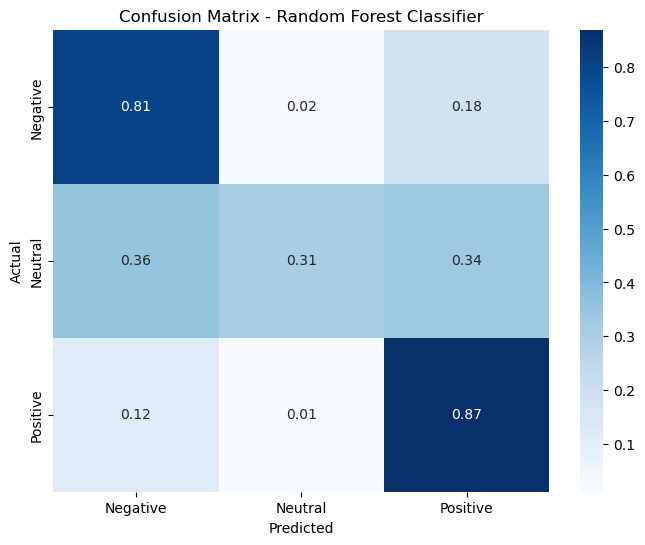

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have 'y_test' and 'y_pred_rf' defined
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Normalize confusion matrix
conf_matrix_rf_norm = conf_matrix_rf.astype('float') / conf_matrix_rf.sum(axis=1)[:, np.newaxis]

# Create a heatmap with normalized values
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print(conf_matrix_rf_norm)

plt.show()


In [77]:
merged_df

,airline,sentiment_category,lemmatized_text
0,AB Aviation,positive,"[moroni, moheli, turned, pretty, decent, airline, online, booking, worked, well, checkin, boarding, fine, plane, looked, well, maintained, short, flight, 20, minute, expect, much, still, managed, hand, bottle, water, biscuit, though, nice, flight, time]"
1,AB Aviation,neutral,"[moroni, anjouan, small, airline, ticket, advised, turn, 0800hrs, confusion, small, airport, directed, office, ab, aviation, still, closed, opened, 0900hrs, told, flight, put, back, 1300hrs, tried, contact, could, true, phone, number, local, guide, informed, either, presume, bumped, later, flight, operate, usual, confusion, flight, 30mins, problem, good, airline, one, comoros]"
2,AB Aviation,positive,"[anjouan, dzaoudzi, small, airline, airline, based, comoros, disorganised, local, big, package, disinterested, staff, flight, fortunately, short, 30, min, took, time, landed, time, short, flight, like, course, entertainment, cabin, service, except, biscuit, bottle, water, quite, nice]"
3,Adria Airways,negative,"[please, favor, fly, adria, route, munich, pristina, july, 2019, lost, luggage, 10, day, row, despite, numerous, phone, call, able, locate, 11, day, later, luggage, arrived, destination, completely, ruined, applying, compensation, ignored, request, foolishly, booked, another, flight, 345, euro, frankfurt, pristina, september, cancelled, flight, reason, 24, hour, departure, desperate, phone, call, customer, service, get, anything, rerouting, compensation, etc, responded, never, fly, adria, disgrace, shame, adria, constantly, deceiving, customer]"
4,Adria Airways,positive,"[book, flight, airline, friend, returned, sofia, amsterdam, september, 22, 3, day, sent, u, sm, informing, flight, cancelled, 3, straight, day, tried, reach, airline, web, agent, get, solution, finally, 18, hour, cancelled, flight, time, 35, minute, call, waiting, airline, able, get, u, flight, lufthansa, book, adria, airway, unreliable, case, ruined, last, day, holiday, since, needed, phone, day]"
...,...,...,...
115848,American Airlines,positive,"[thank, got, different, flight, chicago]"
115849,American Airlines,negative,"[leaving, 20, minute, late, flight, warning, communication, 15, minute, late, flight, called, shitty, customer, svc]"
115850,American Airlines,positive,"[please, bring, american, airline, blackberry10]"
115851,American Airlines,positive,"[money, change, flight, answer, phone, suggestion, make, commitment]"


- True Negative (4966): The model correctly predicted instances that belong to the "negative" class.
- False Positive (705): The model incorrectly predicted instances as "neutral" when they actually belong to the "negative" class.
- False Negative (735): The model incorrectly predicted instances as "negative" when they actually belong to the "neutral" class.
- True Positive (2): The model correctly predicted instances that belong to the "neutral" class.
- True Negative (1372): The model correctly predicted instances that belong to the "positive" class.
- False Positive (0): The model incorrectly predicted instances as "neutral" when they actually belong to the "positive" class.
- False Negative (0): The model incorrectly predicted instances as "negative" when they actually belong to the "positive" class.
- True Positive (5024): The model correctly predicted instances that belong to the "positive" class.


## Exploratory Data Analysis and Visualization 

### Top 10  airlines by recommendations with average rating > 7.5

In [4]:
import pandas as pd
def top_10_airlines_by_recommendations_with_avg_rating_above_7_5(df):
    # Count the number of 'yes' recommendations for each airline
    recommendations = df[df['recommended'] == 'yes'].groupby('airline').size()

    # Calculate average ratings for each airline
    avg_ratings = df.groupby('airline')['rating'].mean()

    # Combine average ratings with recommendation counts
    combined_df = pd.DataFrame({
        'Average Rating': avg_ratings,
        'Number of Recommendations': recommendations
    })

    # Filter airlines with average rating above 7.5
    airlines_above_7_5_rating = combined_df[combined_df['Average Rating'] > 7.5]

    # Sort by number of recommendations (descending)
    top_10 = airlines_above_7_5_rating.sort_values(by='Number of Recommendations', ascending=False).head(10)

    # Convert the Number of Recommendations to integer
    top_10['Number of Recommendations'] = top_10['Number of Recommendations'].astype(int)

    return top_10

df = pd.read_csv("data.csv")
# Displaying the top 10 airlines with the highest number of recommendations and average rating above 7.5
top_10_airlines_recommendations_ratings_above_7_5_df = top_10_airlines_by_recommendations_with_avg_rating_above_7_5(df)
top_10_airlines_recommendations_ratings_above_7_5_df



,Average Rating,Number of Recommendations
airline,,
China Southern Airlines,7.992000,891
Garuda Indonesia,8.107539,791
EVA Air,7.793701,521
ANA All Nippon Airways,7.839161,473
Asiana Airlines,7.908730,418
Hainan Airlines,8.366337,350
Bangkok Airways,7.529557,307
Air Astana,7.743697,195
Lao Skyway,7.861111,65


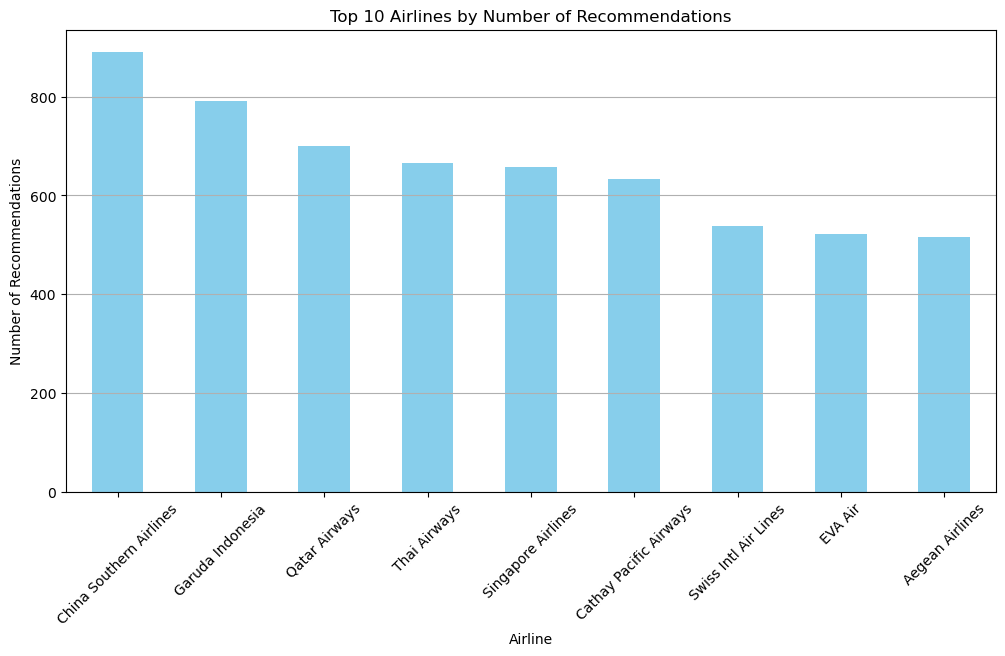

In [6]:
import matplotlib.pyplot as plt

def plot_top_10_airlines_by_recommendations(df):
    # Count the number of recommendations for each airline
    recommendations = df[df['recommended'] == 'yes'].groupby('airline').size()

    # Sort by number of recommendations and select top 10
    top_10_recommendations = recommendations.sort_values(ascending=False).head(9)

    # Plotting
    plt.figure(figsize=(12, 6))
    top_10_recommendations.plot(kind='bar', color='skyblue')
    plt.title('Top 10 Airlines by Number of Recommendations')
    plt.ylabel('Number of Recommendations')
    plt.xlabel('Airline')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Plotting the graph for top 10 airlines by number of recommendations
plot_top_10_airlines_by_recommendations(df)


#### Here, China Southern Airlines is the most recommended airline with average rating of 7.99 and 890 Recommendations.


### Top 10  worst airlines with average rating < 3

In [80]:
def top_10_worst_airlines(df):
    # Count the number of 'no' recommendations for each airline
    no_recommendations = df[df['recommended'] == 'no'].groupby('airline').size()

    # Calculate average ratings
    avg_ratings = df.groupby('airline')['rating'].mean()

    # Combine into a single DataFrame
    combined_df = pd.DataFrame({
        'Average Rating': avg_ratings,
        'Not recommended count': no_recommendations
    })

    # Filter out airlines with no 'no' recommendations
    combined_df_filtered = combined_df.dropna(subset=['Not recommended count'])

    # Sort by number of 'no' recommendations (descending) and average rating (ascending)
    top_10_worst = combined_df_filtered.sort_values(by=['Not recommended count', 'Average Rating'], ascending=[False, True]).head(10)

    # Add numbering as a new column
    top_10_worst['Rank'] = range(1, len(top_10_worst) + 1)

    # Rearranging columns so that 'Rank' appears first
    top_10_worst = top_10_worst[['Average Rating', 'Not recommended count']]

    return top_10_worst

# Displaying the top 10 worst airlines with the highest number of 'no' recommendations
top_10_worst_airlines_df = top_10_worst_airlines(df)
top_10_worst_airlines_df


,Average Rating,Not recommended count
airline,,
Frontier Airlines,1.268000,983.0
Spirit Airlines,1.587000,943.0
American Airlines,2.086000,897.0
Allegiant Air,2.005000,893.0
Jetblue Airways,2.241000,889.0
Air Canada,2.539000,859.0
United Airlines,2.532000,844.0
Wizz Air,2.409000,837.0
Vueling Airlines,2.608916,819.0


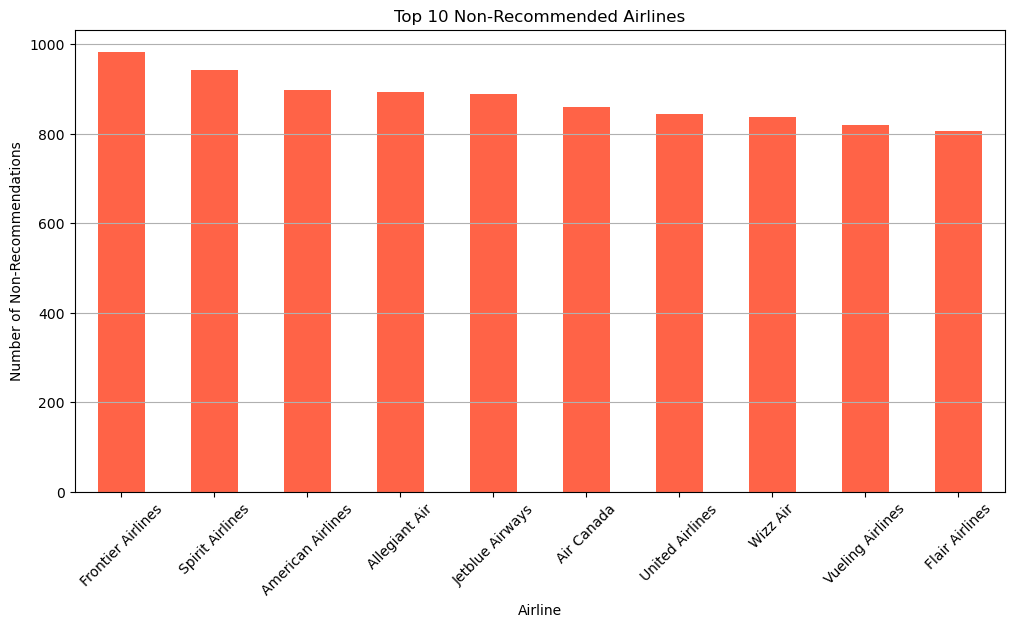

In [81]:
def plot_top_10_worst_airlines(df):
    # Count the number of 'no' recommendations for each airline
    no_recommendations = df[df['recommended'] == 'no'].groupby('airline').size()

    # Calculate average ratings
    avg_ratings = df.groupby('airline')['rating'].mean()

    # Combine into a single DataFrame
    combined_df = pd.DataFrame({
        'Average Rating': avg_ratings,
        'Not recommended count': no_recommendations
    })

    # Filter out airlines with no 'no' recommendations
    combined_df_filtered = combined_df.dropna(subset=['Not recommended count'])

    # Sort by number of 'no' recommendations (descending) and average rating (ascending)
    top_10_worst = combined_df_filtered.sort_values(by=['Not recommended count', 'Average Rating'], ascending=[False, True]).head(10)

    # Plotting
    plt.figure(figsize=(12, 6))
    top_10_worst['Not recommended count'].plot(kind='bar', color='tomato')
    plt.title('Top 10 Non-Recommended Airlines')
    plt.ylabel('Number of Non-Recommendations')
    plt.xlabel('Airline')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Plotting the graph for top 10 worst airlines by number of 'no' recommendations
plot_top_10_worst_airlines(df)


#### Here, Frontier Airlines is the least recommended airline with average rating of 1.268 and 980 Non-Recommendations.


### Top 10 most recommended economy airlines with average rating > 7.5

In [13]:
def top_10_most_recommended_economy_airlines_above_7_5(df):
    # Filter for Economy Class
    economy = df[df['seat_type'] == 'Economy Class']

    # Count the number of 'yes' recommendations for each airline in Economy Class
    yes_recommendations = economy[economy['recommended'] == 'yes'].groupby('airline').size()

    # Combine with average ratings
    avg_ratings = economy.groupby('airline')['rating'].mean()
    combined_df = pd.DataFrame({
        'Average Rating': avg_ratings,
        'Number of Recommendations': yes_recommendations
    })

    # Filter for airlines with an average rating above 7.5
    filtered_df = combined_df[combined_df['Average Rating'] > 7.5]

    # Sort by number of 'yes' recommendations (descending) and then by average rating (descending)
    top_10_economy = filtered_df.sort_values(by=['Number of Recommendations', 'Average Rating'], ascending=[False, False]).head(10)

    return top_10_economy

# Displaying the top 10 most recommended economy airlines with average rating > 7.5
top_10_most_recommended_economy_airlines_above_7_5_df = top_10_most_recommended_economy_airlines_above_7_5(df)
top_10_most_recommended_economy_airlines_above_7_5_df


,Average Rating,Number of Recommendations
airline,,
China Southern Airlines,7.840559,622.0
Garuda Indonesia,7.748654,467.0
Korean Air,7.603365,324.0
ANA All Nippon Airways,7.859375,320.0
Bangkok Airways,7.510526,287.0
Asiana Airlines,7.898148,273.0
Hainan Airlines,8.233677,248.0
Lao Skyway,7.928571,64.0
BA CityFlyer,8.557692,50.0


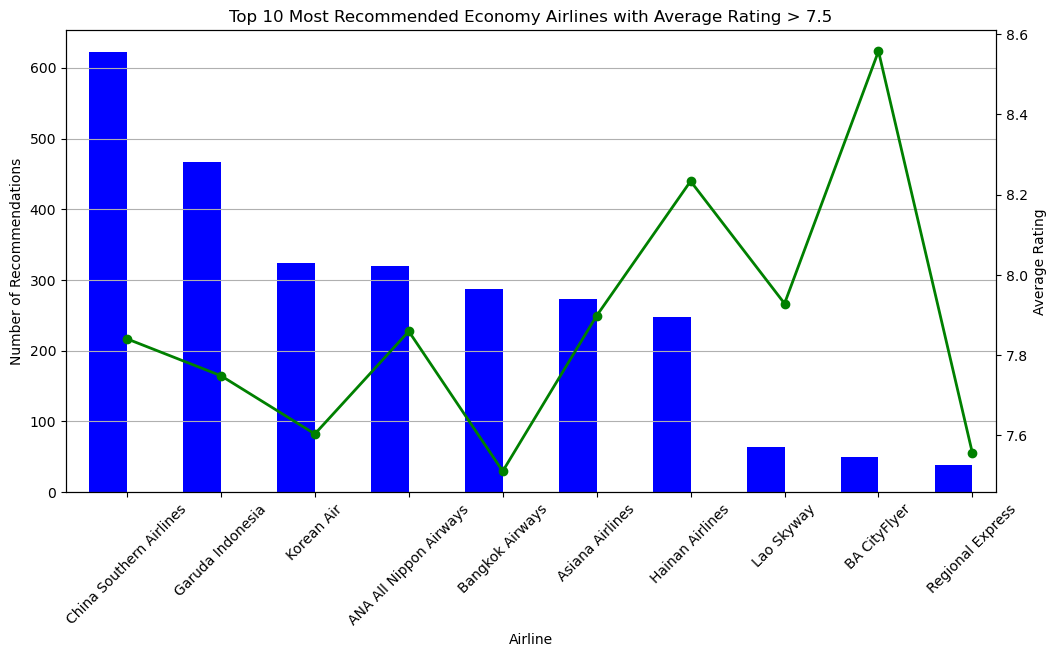

In [14]:
import matplotlib.pyplot as plt


def plot_top_10_most_recommended_economy_airlines_above_7_5(top_10_df):
    plt.figure(figsize=(12, 6))

    # Plotting the number of recommendations
    ax = top_10_df['Number of Recommendations'].plot(kind='bar', color='blue', position=1, width=0.4)

    # Creating a secondary y-axis for the average rating
    ax2 = ax.twinx()
    ax2.plot(top_10_df['Average Rating'].values, color='green', marker='o', linewidth=2)

    # Setting plot properties
    ax.set_xticklabels(top_10_df.index, rotation=45)
    ax.set_title('Top 10 Most Recommended Economy Airlines with Average Rating > 7.5')
    ax.set_xlabel('Airline')
    ax.set_ylabel('Number of Recommendations')
    ax2.set_ylabel('Average Rating')
    ax.grid(axis='y')

    plt.show()

# Plot the graph
plot_top_10_most_recommended_economy_airlines_above_7_5(top_10_most_recommended_economy_airlines_above_7_5_df)


#### Here, China Southern Airlines is the most recommended economy airline with average rating of 7.84 and 622 Recommendations.

### Top 10 most recommended business airlines with average rating > 7.5

In [84]:
def top_10_most_recommended_business_airlines_above_7_5(df):
    # Filter for Economy Class
    business = df[df['seat_type'] == 'Business Class']

    # Count the number of 'yes' recommendations for each airline in Economy Class
    yes_recommendations = business[business['recommended'] == 'yes'].groupby('airline').size()

    # Combine with average ratings
    avg_ratings = business.groupby('airline')['rating'].mean()
    combined_df = pd.DataFrame({
        'Average Rating': avg_ratings,
        'Number of Recommendations': yes_recommendations
    })

    # Filter for airlines with an average rating above 7.5
    filtered_df = combined_df[combined_df['Average Rating'] > 7.5]

    # Sort by number of 'yes' recommendations (descending) and then by average rating (descending)
    top_10_economy = filtered_df.sort_values(by=['Number of Recommendations', 'Average Rating'], ascending=[False, False]).head(10)

    return top_10_economy

# Displaying the top 10 most recommended economy airlines with average rating > 7.5
top_10_most_recommended_business_airlines_above_7_5_df = top_10_most_recommended_business_airlines_above_7_5(df)
top_10_most_recommended_business_airlines_above_7_5_df


,Average Rating,Number of Recommendations
airline,,
Garuda Indonesia,8.357414,242.0
China Southern Airlines,8.381166,212.0
EVA Air,8.567308,192.0
Asiana Airlines,7.798742,126.0
ANA All Nippon Airways,7.776224,118.0
Oman Air,7.640845,111.0
Hainan Airlines,8.729730,100.0
Royal Brunei Airlines,7.761905,89.0
Air Astana,8.546512,80.0


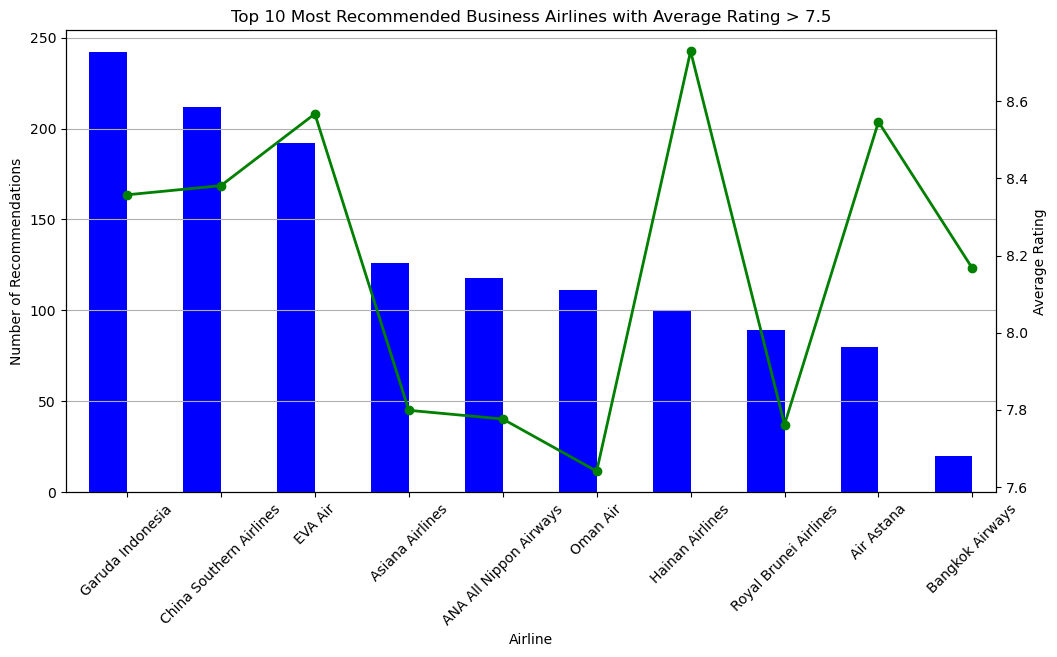

In [85]:
import matplotlib.pyplot as plt

# Assuming top_10_most_recommended_economy_airlines_above_7_5_df is the DataFrame obtained from the previous function

def plot_top_10_most_recommended_business_airlines_above_7_5(top_10_df):
    plt.figure(figsize=(12, 6))

    # Plotting the number of recommendations
    ax = top_10_df['Number of Recommendations'].plot(kind='bar', color='blue', position=1, width=0.4)

    # Creating a secondary y-axis for the average rating
    ax2 = ax.twinx()
    ax2.plot(top_10_df['Average Rating'].values, color='green', marker='o', linewidth=2)

    # Setting plot properties
    ax.set_xticklabels(top_10_df.index, rotation=45)
    ax.set_title('Top 10 Most Recommended Business Airlines with Average Rating > 7.5')
    ax.set_xlabel('Airline')
    ax.set_ylabel('Number of Recommendations')
    ax2.set_ylabel('Average Rating')
    ax.grid(axis='y')

    plt.show()

# Plot the graph
plot_top_10_most_recommended_business_airlines_above_7_5(top_10_most_recommended_business_airlines_above_7_5_df)


#### Here, Garuda Indonesia Airline is the most recommended business airline with average rating of 8.35 and 242 Recommendations.

### Top 5 airlines in 2020 by recommendations and rating above 7.5

In [86]:
def top_5_airlines_in_2020_by_recommendations_and_rating_above_7_5(df, year):
    # Filter data for the specified year
    df_year = df[pd.to_datetime(df['date_flown']).dt.year == year]

    # Count the number of 'yes' recommendations for each airline in the specified year
    yes_recommendations = df_year[df_year['recommended'] == 'yes'].groupby('airline').size()

    # Calculate average ratings for each airline
    avg_ratings = df_year.groupby('airline')['rating'].mean()

    # Combine average ratings with recommendation counts
    combined_df = pd.DataFrame({
        'Average Rating': avg_ratings,
        'Number of Recommendations': yes_recommendations
    })

    # Filter for airlines with average rating above 7.5
    airlines_above_7_5_rating = combined_df[combined_df['Average Rating'] > 7.5]

    # Sort by number of recommendations (descending) and average rating (descending)
    top_5 = airlines_above_7_5_rating.sort_values(by=['Number of Recommendations', 'Average Rating'], ascending=[False, False]).head(5)

    return top_5

# Displaying the top 5 airlines in 2020 with the highest number of recommendations and average rating above 7.5
top_5_airlines_2020_recommendations_ratings_above_7_5_df = top_5_airlines_in_2020_by_recommendations_and_rating_above_7_5(df, 2020)
top_5_airlines_2020_recommendations_ratings_above_7_5_df


,Average Rating,Number of Recommendations
airline,,
Qatar Airways,8.283465,106.0
Thai Smile Airways,8.258621,48.0
China Southern Airlines,8.814815,25.0
Hainan Airlines,9.090909,11.0
ANA All Nippon Airways,8.900000,10.0


#### Qatar Airways was the most recommended airline in 2020 with an average rating of 8.2 and 106 recommendations.

### Top 5 airlines in 2021 by recommendations and rating above 7.5

In [19]:
def top_5_airlines_in_2021_by_recommendations_and_rating_above_7_5(df, year):
    # Filter data for the specified year
    df_year = df[pd.to_datetime(df['date_flown']).dt.year == year]

    # Count the number of 'yes' recommendations for each airline in the specified year
    yes_recommendations = df_year[df_year['recommended'] == 'yes'].groupby('airline').size()

    # Calculate average ratings for each airline
    avg_ratings = df_year.groupby('airline')['rating'].mean()

    # Combine average ratings with recommendation counts
    combined_df = pd.DataFrame({
        'Average Rating': avg_ratings,
        'Number of Recommendations': yes_recommendations
    })

    # Filter for airlines with average rating above 7.5
    airlines_above_7_5_rating = combined_df[combined_df['Average Rating'] > 7.5]

    # Sort by number of recommendations (descending) and average rating (descending)
    top_5 = airlines_above_7_5_rating.sort_values(by=['Number of Recommendations', 'Average Rating'], ascending=[False, False]).head(5)

    return top_5

# Displaying the top 5 airlines in 2022 with the highest number of recommendations and average rating above 7.5
top_5_airlines_2021_recommendations_ratings_above_7_5_df = top_5_airlines_in_2021_by_recommendations_and_rating_above_7_5(df, 2021)
top_5_airlines_2021_recommendations_ratings_above_7_5_df


,Average Rating,Number of Recommendations
airline,,
Qatar Airways,8.106870,108.0
China Southern Airlines,9.109756,80.0
Regional Express,8.571429,19.0
Thai Smile Airways,9.294118,16.0
Hainan Airlines,10.000000,9.0


#### Qatar Airways was the most recommended airline in 2021 with an average rating of 8.10 with 108 recommendations. But, the maximum average rating was of China Southern Airlines i.e 9.10 with 80 recommendations

### Top 5 airlines in 2022 by recommendations and rating above 7.5

In [18]:
def top_5_airlines_in_2022_by_recommendations_and_rating_above_7_5(df, year):
    # Filter data for the specified year
    df_year = df[pd.to_datetime(df['date_flown']).dt.year == year]

    # Count the number of 'yes' recommendations for each airline in the specified year
    yes_recommendations = df_year[df_year['recommended'] == 'yes'].groupby('airline').size()

    # Calculate average ratings for each airline
    avg_ratings = df_year.groupby('airline')['rating'].mean()

    # Combine average ratings with recommendation counts
    combined_df = pd.DataFrame({
        'Average Rating': avg_ratings,
        'Number of Recommendations': yes_recommendations
    })

    # Filter for airlines with average rating above 7.5
    airlines_above_7_5_rating = combined_df[combined_df['Average Rating'] > 7.5]

    # Sort by number of recommendations (descending) and average rating (descending)
    top_5 = airlines_above_7_5_rating.sort_values(by=['Number of Recommendations', 'Average Rating'], ascending=[False, False]).head(5)

    return top_5

# Displaying the top 5 airlines in 2022 with the highest number of recommendations and average rating above 7.5
top_5_airlines_2021_recommendations_ratings_above_7_5_df = top_5_airlines_in_2021_by_recommendations_and_rating_above_7_5(df, 2022)
top_5_airlines_2021_recommendations_ratings_above_7_5_df


,Average Rating,Number of Recommendations
airline,,
Thai Smile Airways,7.521127,52.0
China Southern Airlines,9.187500,32.0
Rex Airlines,8.457143,30.0
ANA All Nippon Airways,8.210526,15.0
Garuda Indonesia,8.750000,14.0


#### Thai Smile Airways was the most recommended airline in 2021 with an average rating of 7.52 with 52 recommendations. But, the maximum average rating was of China Southern Airlines i.e 9.18 with 32 recommendations

### Top 5 airlines in 2021 by recommendations and rating above 7.5

In [89]:
def top_5_airlines_in_2023_by_recommendations_and_rating_above_7_5(df, year):
    # Filter data for the specified year
    df_year = df[pd.to_datetime(df['date_flown']).dt.year == year]

    # Count the number of 'yes' recommendations for each airline in the specified year
    yes_recommendations = df_year[df_year['recommended'] == 'yes'].groupby('airline').size()

    # Calculate average ratings for each airline
    avg_ratings = df_year.groupby('airline')['rating'].mean()

    # Combine average ratings with recommendation counts
    combined_df = pd.DataFrame({
        'Average Rating': avg_ratings,
        'Number of Recommendations': yes_recommendations
    })

    # Filter for airlines with average rating above 7.5
    airlines_above_7_5_rating = combined_df[combined_df['Average Rating'] > 7.5]

    # Sort by number of recommendations (descending) and average rating (descending)
    top_5 = airlines_above_7_5_rating.sort_values(by=['Number of Recommendations', 'Average Rating'], ascending=[False, False]).head(5)

    return top_5

# Displaying the top 5 airlines in 2023 with the highest number of recommendations and average rating above 7.5
top_5_airlines_2021_recommendations_ratings_above_7_5_df = top_5_airlines_in_2021_by_recommendations_and_rating_above_7_5(df, 2023)
top_5_airlines_2021_recommendations_ratings_above_7_5_df


,Average Rating,Number of Recommendations
airline,,
Volotea,7.886598,80.0
Garuda Indonesia,9.214286,41.0
ANA All Nippon Airways,7.657143,26.0
Uzbekistan Airways,8.000000,5.0
Hainan Airlines,9.750000,3.0


### Top 3 Airlines improvement over the years (2019 to 2023)

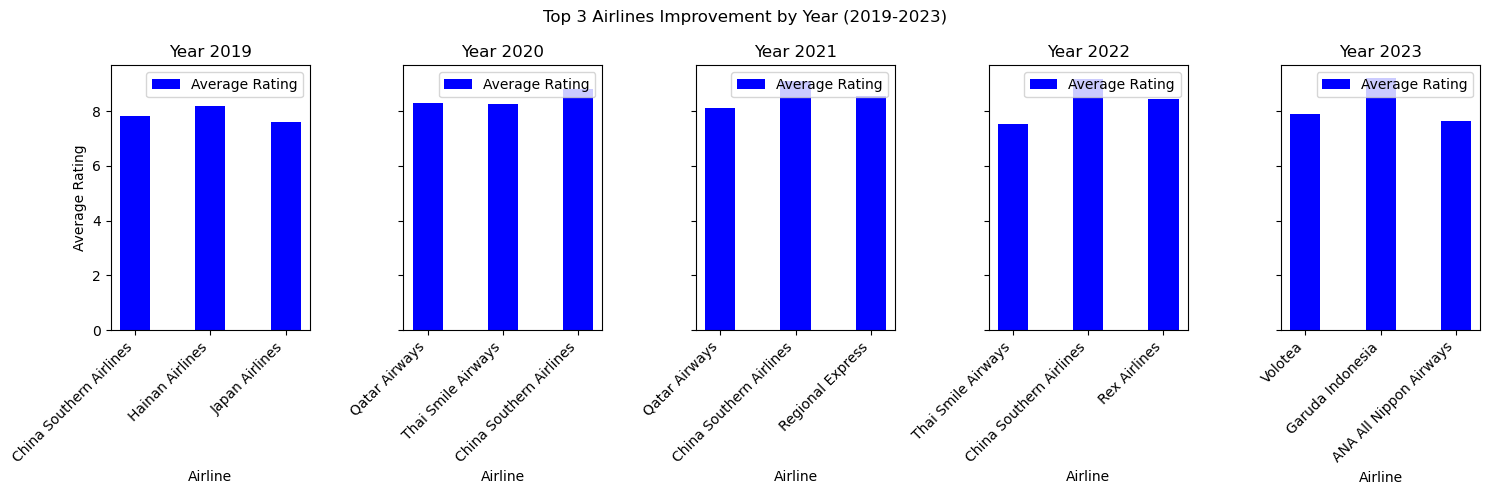

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_top_3_airlines_by_year(df, start_year, end_year):
    fig, axes = plt.subplots(1, end_year - start_year + 1, figsize=(15, 5), sharey=True)

    for i, year in enumerate(range(start_year, end_year + 1)):
        # Filter data for the specified year
        df_year = df[pd.to_datetime(df['date_flown']).dt.year == year]

        # Count the number of 'yes' recommendations and calculate average ratings
        yes_recommendations = df_year[df_year['recommended'] == 'yes'].groupby('airline').size()
        avg_ratings = df_year.groupby('airline')['rating'].mean()

        # Combine into a DataFrame and filter for airlines with average rating above 7.5
        combined_df = pd.DataFrame({
            'Average Rating': avg_ratings,
            'Number of Recommendations': yes_recommendations
        })
        top_3 = combined_df[combined_df['Average Rating'] > 7.5].sort_values(by='Number of Recommendations', ascending=False).head(3)

        # Bar chart for each year
        axes[i].bar(top_3.index, top_3['Average Rating'], color='blue', width=0.4, label='Average Rating')
        axes[i].set_title(f"Year {year}")
        axes[i].set_xlabel('Airline')

        # Set xticks and labels
        axes[i].set_xticks(range(len(top_3.index)))
        axes[i].set_xticklabels(top_3.index, rotation=45, ha='right')  # Rotating the x-axis labels for better visibility

        axes[i].set_ylabel('Average Rating' if i == 0 else "")
        axes[i].legend(loc='upper right')

    plt.suptitle('Top 3 Airlines Improvement by Year (2019-2023)')
    plt.tight_layout()
    plt.show()

# Assuming 'df' is your DataFrame
plot_top_3_airlines_by_year(df, 2019, 2023)


#### From the above graph, we can see that China Southern Airlines has significantly improved its rating over the years.

### Most Improved and Recommended Airline of from 2019 to 2023

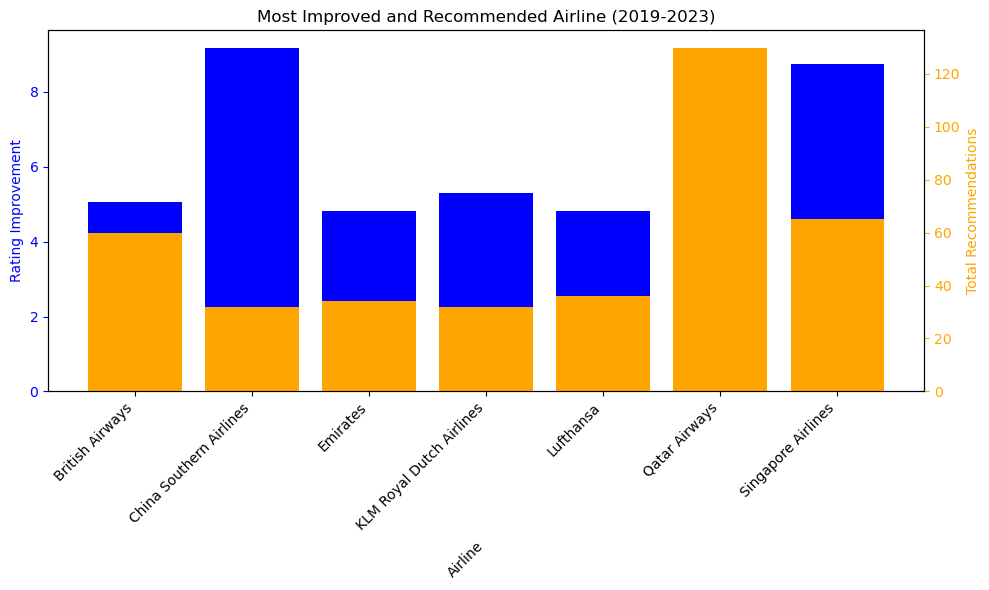

The most improved and recommended airline from 2019 to 2023 is: China Southern Airlines
Data: {'rating_improvement': 9.1875, 'total_recommendations': 32, 'last_rating': 6.911111111111111, 'last_recommendations': 32, 'meets_criteria': True}


In [91]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_most_improved_airline(df):
    improvement_tracker = {}

    for year in range(2019, 2024):
        df_year = df[pd.to_datetime(df['date_flown']).dt.year == year]
        avg_ratings = df_year.groupby('airline')['rating'].mean()
        recommendations = df_year[df_year['recommended'] == 'yes'].groupby('airline').size()

        for airline in avg_ratings.index:
            if airline not in improvement_tracker:
                improvement_tracker[airline] = {
                    'rating_improvement': 0,
                    'total_recommendations': 0,
                    'last_rating': 0,
                    'last_recommendations': 0,
                    'meets_criteria': False
                }

            current_rating = avg_ratings[airline]
            current_recommendations = recommendations.get(airline, 0)

            if year == 2019 and current_recommendations > 80:
                improvement_tracker[airline]['meets_criteria'] = True

            if improvement_tracker[airline]['meets_criteria']:
                rating_improvement = current_rating - improvement_tracker[airline]['last_rating']
                recommendation_improvement = current_recommendations - improvement_tracker[airline]['last_recommendations']

                improvement_tracker[airline]['rating_improvement'] += max(0, rating_improvement)
                improvement_tracker[airline]['total_recommendations'] += recommendation_improvement
                improvement_tracker[airline]['last_rating'] = current_rating
                improvement_tracker[airline]['last_recommendations'] = current_recommendations

    # Filter airlines that meet the criteria and have increasing ratings and recommendations
    filtered_airlines = {k: v for k, v in improvement_tracker.items() if v['meets_criteria'] and v['rating_improvement'] > 0 and v['total_recommendations'] > 0}

    # Plotting the data with rotated individual airline names on x-axis
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.bar(range(len(filtered_airlines)), [v['rating_improvement'] for v in filtered_airlines.values()], color='blue', label='Rating Improvement')
    ax1.set_xlabel('Airline', rotation=45, ha='right')  # Rotate x-axis labels
    ax1.set_ylabel('Rating Improvement', color='blue')
    ax1.tick_params('y', colors='blue')
    ax1.set_xticks(range(len(filtered_airlines)))
    ax1.set_xticklabels(filtered_airlines.keys(), rotation=45, ha='right')  # Rotate individual airline names

    ax2 = ax1.twinx()
    ax2.bar(range(len(filtered_airlines)), [v['total_recommendations'] for v in filtered_airlines.values()], color='orange', label='Total Recommendations')
    ax2.set_ylabel('Total Recommendations', color='orange')
    ax2.tick_params('y', colors='orange')

    plt.title('Most Improved and Recommended Airline (2019-2023)')
    plt.tight_layout()  # Adjust layout to prevent clipping of rotated labels
    plt.show()

    most_improved_airline = max(filtered_airlines, key=lambda x: (filtered_airlines[x]['rating_improvement'], filtered_airlines[x]['total_recommendations']), default=None)

    return most_improved_airline, filtered_airlines.get(most_improved_airline, {})

# Assuming 'df' is your DataFrame
most_improved_airline, airline_data = analyze_most_improved_airline(df)
print(f"The most improved and recommended airline from 2019 to 2023 is: {most_improved_airline}")
print("Data:", airline_data)


### Top 10 Airlines in 2023 with Best Food Experience in 2023

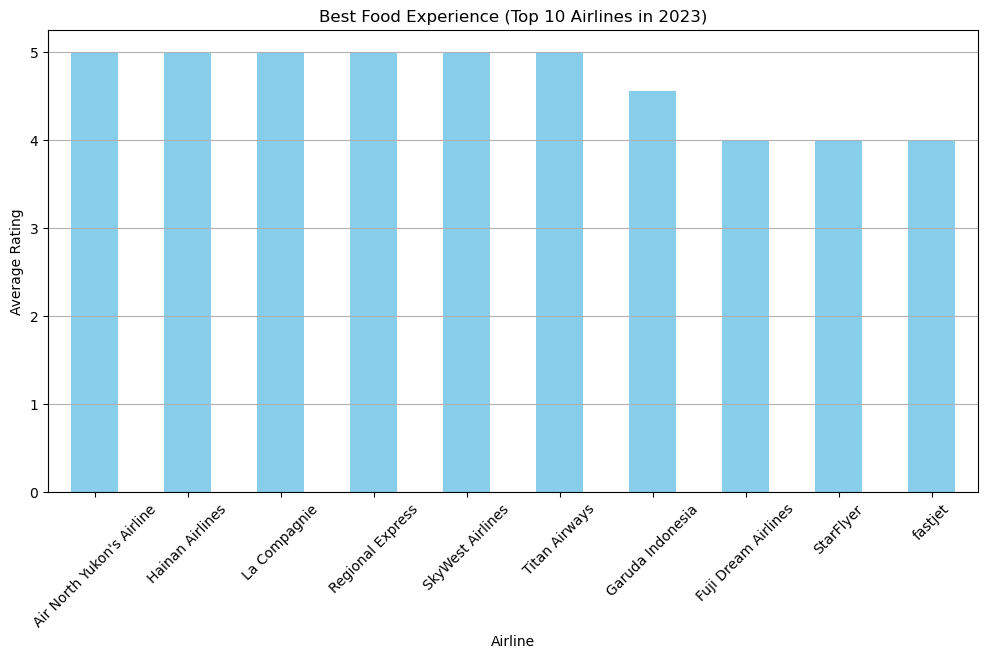

In [21]:
# Convert 'None' and other non-numeric values to NaN and the date to a datetime
cols = ['food_rating', 'seat_comfort_rating', 'cabin_staff_service_rating', 'value_for_money_rating']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df['date_flown'] = pd.to_datetime(df['date_flown'])

# Filter the data for the year 2023
df_2023 = df[df['date_flown'].dt.year == 2023]

# Calculate and assign the average rating correctly
df_2023 = df_2023.copy()  # Create a copy to avoid the SettingWithCopyWarning
df_2023['average_rating'] = df_2023[cols].mean(axis=1)

# Find the top 10 airlines based on the average of all four ratings in 2023
df_2023['average_rating'] = df_2023[cols].mean(axis=1)
top_10_airlines_2023 = df_2023.groupby('airline')['average_rating'].mean().sort_values(ascending=False).head(10).index

# Filter the data to include only the top 10 airlines
top_10_df = df_2023[df_2023['airline'].isin(top_10_airlines_2023)]

# Plotting graphs for each category for the top 10 airlines in 2023
def plot_top_10_in_category(df, category, title):
    mean_ratings = df.groupby('airline')[category].mean().sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    mean_ratings.plot(kind='bar', color='skyblue')
    plt.title(f'{title} (Top 10 Airlines in 2023)')
    plt.ylabel('Average Rating')
    plt.xlabel('Airline')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

plot_top_10_in_category(top_10_df, 'food_rating', 'Best Food Experience')


### Top 10 Airlines in 2023 with Best Seat Comfort in 2023

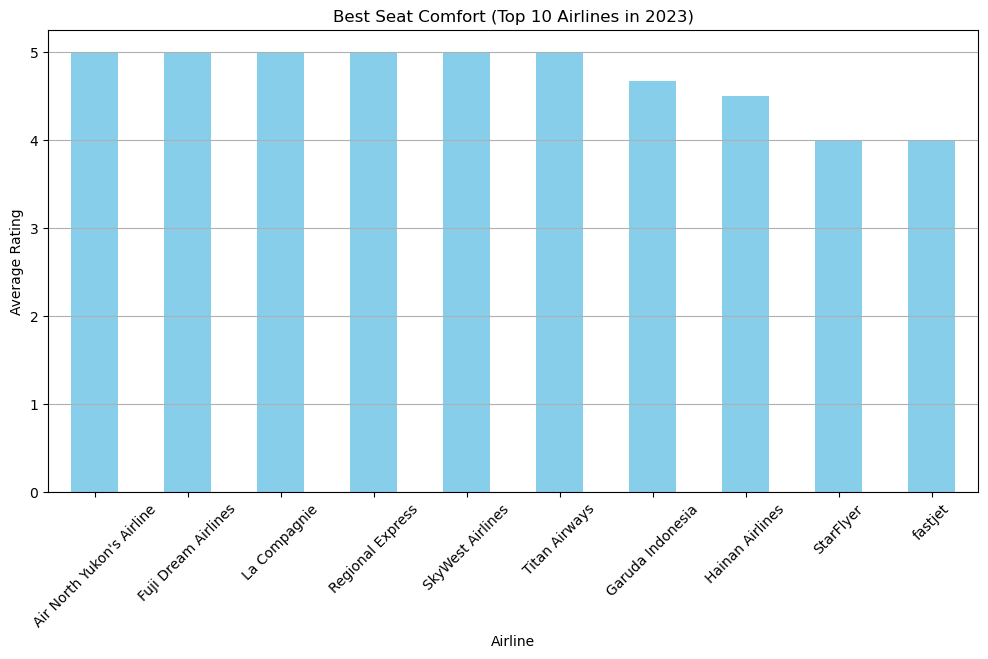

In [22]:
plot_top_10_in_category(top_10_df, 'seat_comfort_rating', 'Best Seat Comfort')


### Top 10 Airlines in 2023 with Best Cabin Crew in 2023

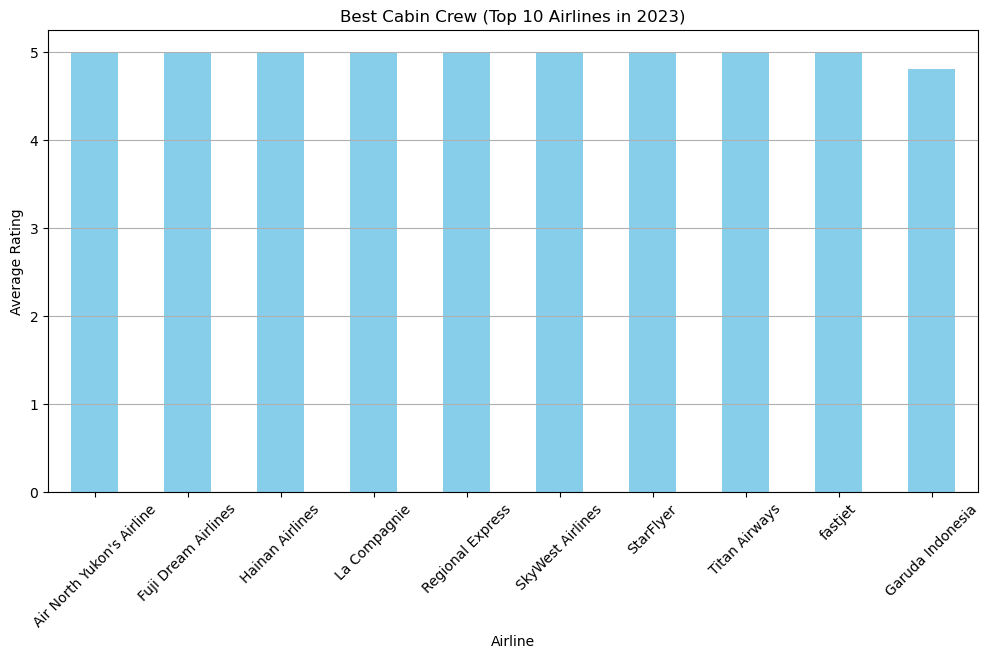

In [23]:
plot_top_10_in_category(top_10_df, 'cabin_staff_service_rating', 'Best Cabin Crew')


### Top 10 Airlines in 2023 with Best Cabin Crew in 2023

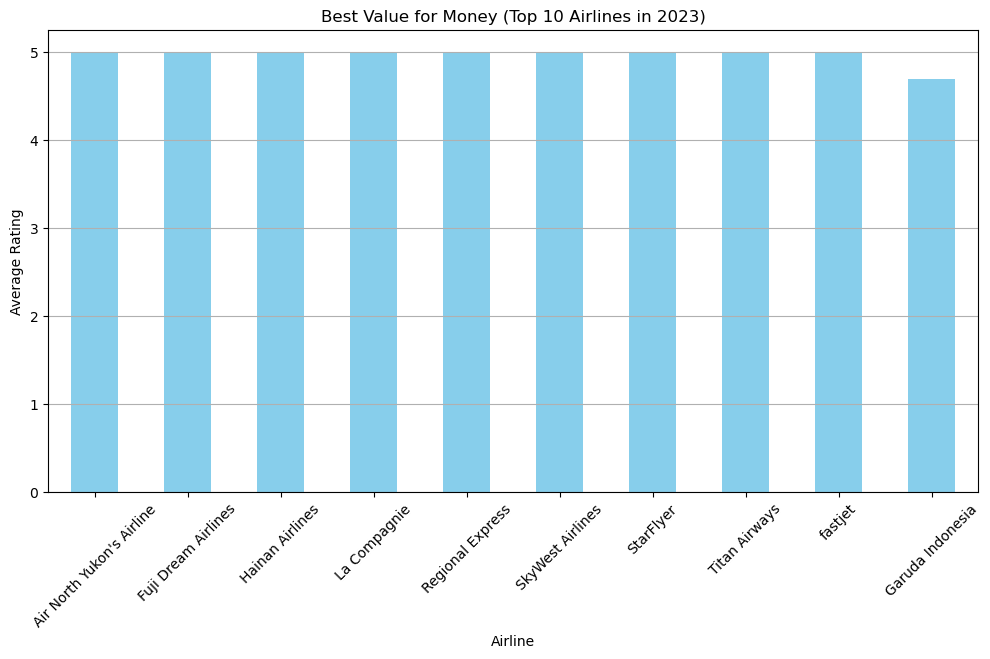

In [95]:
plot_top_10_in_category(top_10_df, 'value_for_money_rating', 'Best Value for Money')

### CHALLENGES FACED DURING THE PROJECT

#### Challenges in Data Cleaning and Preprocessing:
Challenge: Dealing with disorganized, inconsistent, or incomplete datasets.
Solution: We established comprehensive data cleaning and preprocessing protocols. These included managing missing values, standardizing the textual data, eliminating extraneous information, and resolving issues with special characters.

#### Challenges Due to Resource Constraints:
Challenge: Facing constraints in computational resources for processing large volumes of data.
Solution: Implemented optimizations in our coding strategies to efficiently handle the extensive datasets despite the limited computational resources.

### CONCLUSION

__Southern China Airlines' Exceptional Performance:__ Southern China Airlines has distinguished itself as the leader in the airline industry, excelling in both economy and business class categories. Its position is bolstered by receiving the highest number of recommendations, a testament to its exemplary service quality and customer satisfaction.

__Hainan Airlines' Mixed Results:__ Hainan Airlines, another prominent Chinese carrier, demonstrates strong performance in terms of average ratings, signifying high customer satisfaction in general. However, its comparatively lower number of recommendations points to an opportunity for improvement in customer engagement and brand loyalty.

__Garuda Indonesia's Potential for Growth:__ Garuda Airlines from Indonesia, while showing impressive average ratings, falls short in comparison to Southern China Airlines in terms of recommendations. This indicates potential areas for growth in enhancing its visibility and customer satisfaction strategies to increase its market presence.

__Challenges for U.S. Domestic Carriers:__ The analysis identifies a significant challenge for U.S. domestic airlines, which top the list for the highest number of non-recommendations and maintain relatively low average ratings, ranging from 1.26 to 2.08. This clearly highlights a critical need for these airlines to improve their services, customer experiences, and overall reputation.

__Insights from the Confusion Matrix:__ 

__The confusion matrix presents interesting insights:__

True Positives (0.87000951) for negative sentiments are high, indicating a strong ability of the model to correctly identify negative reviews.
Moderate True Positives for positive (0.80764946) and neutral (0.30713128) sentiments suggest the model is relatively effective but can be improved in distinguishing these sentiments.
The lower True Positives for neutral sentiments (0.30713128) compared to positive and negative sentiments indicate a potential area for refinement in the model’s ability to accurately classify neutral reviews.
Implications for the Aviation Industry: These findings provide critical insights for airlines. The success of Southern China Airlines in garnering recommendations can serve as a benchmark for other airlines. The need for U.S. domestic airlines to drastically improve their services is urgent to enhance customer perceptions. For airlines like Hainan and Garuda Indonesia, focusing on customer engagement and satisfaction could convert their high ratings into more recommendations.

__Future Directions:__ The analysis underscores the importance of continuous monitoring and improvement in customer service and engagement strategies. Airlines should leverage these insights to identify specific areas of service that require attention and to tailor their strategies to meet evolving customer expectations more effectively.